https://www.youtube.com/watch?v=Fchzk1lDt7Q&ab_channel=Murtaza%27sWorkshop-RoboticsandAI

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

# HOUGH

In [ ]:
# Draw the lines represented in the hough accumulator on the original image
def drawhoughLinesOnImage(image, houghLines):
    for line in houghLines:
        for rho,theta in line:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))
            
            cv2.line(image,(x1,y1),(x2,y2),(0,255,0), 2)   

def draw_circles(img, circles):
  for co, i in enumerate(circles[0, :], start=1):
    cv2.circle(img, (i[0],i[1]), i[2], (255, 0,255), 3)

# Different weights are added to the image to give a feeling of blending
def blend_images(image, final_image, alpha=0.7, beta=1., gamma=0.):
    return cv2.addWeighted(final_image, alpha, image, beta,gamma)

In [ ]:
image = cv2.imread("xo.jpg") # load image in grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
blurredImage = cv2.GaussianBlur(gray_image, (5, 5), 0)
edgeImage = cv2.Canny(blurredImage, 50, 120)

# Detect points that form a line
dis_reso = 1 # Distance resolution in pixels of the Hough grid
theta = np.pi /180 # Angular resolution in radians of the Hough grid
threshold = 170# minimum no of votes

houghLines = cv2.HoughLines(edgeImage, dis_reso, theta, threshold)
circles = cv2.HoughCircles(blurredImage, method=cv2.HOUGH_GRADIENT, dp=0.7, minDist=12, param1=70, param2=80)

houghImage = np.zeros_like(image) # create and empty image

drawhoughLinesOnImage(houghImage, houghLines) # draw the lines on the empty image
draw_circles(houghImage, circles)

orginalImageWithHough = blend_images(houghImage,image) # add two images together, using image blending

(-0.5, 999.5, 665.5, -0.5)

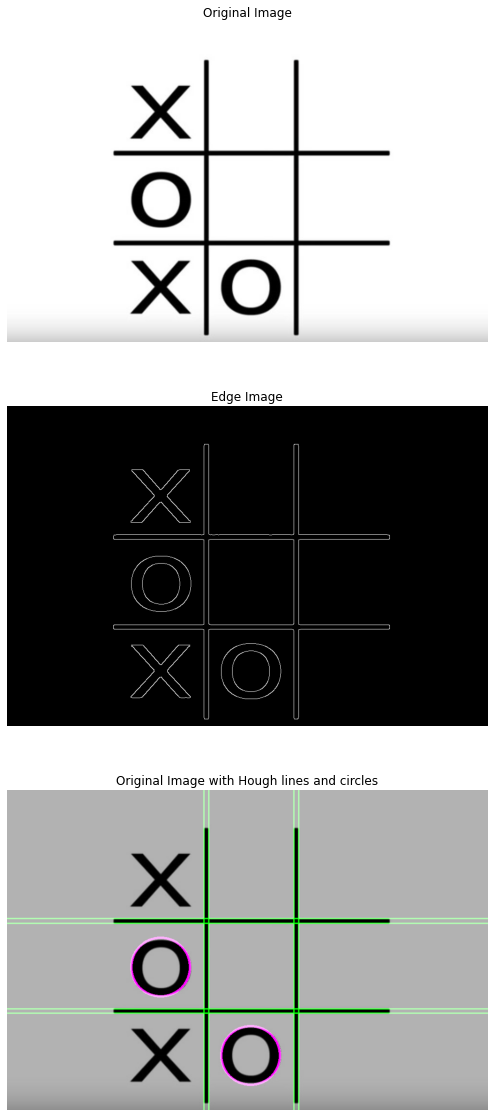

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(20, 20))
ax1.imshow(image)
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(edgeImage, cmap='gray')
edgeImage = edgeImage.astype(np.uint8)
edgeImage = edgeImage * 2
ax2.set_title('Edge Image')
ax2.axis('off')

ax3.imshow(orginalImageWithHough, cmap='gray')
ax3.set_title("Original Image with Hough lines and circles")
ax3.axis('off')

# Contours

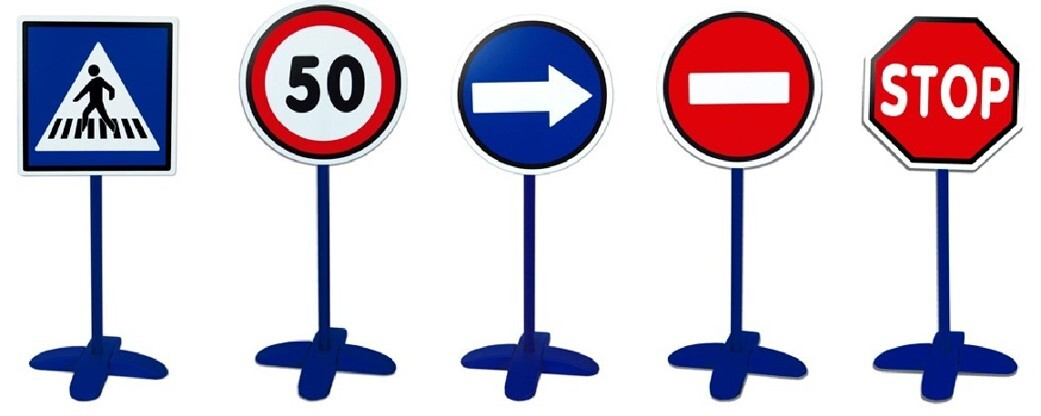

In [ ]:
img = cv2.imread("signs.jpg")
cv2_imshow(img)

In [ ]:
img_contour = img.copy()

img_blur = cv2.GaussianBlur(img, (7, 7), 1)
img_gray = cv2.cvtColor(img_blur, cv2.COLOR_BGR2GRAY)

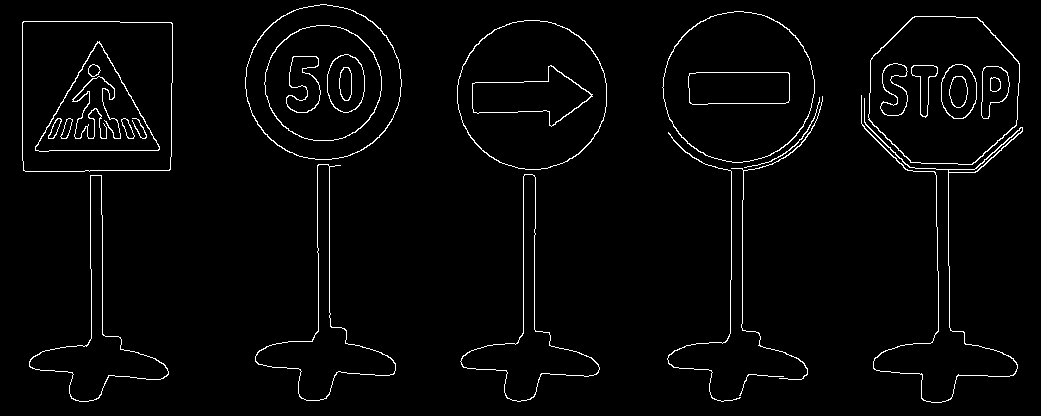

In [ ]:
img_canny = cv2.Canny(img_gray, 200, 400)
cv2_imshow(img_canny)

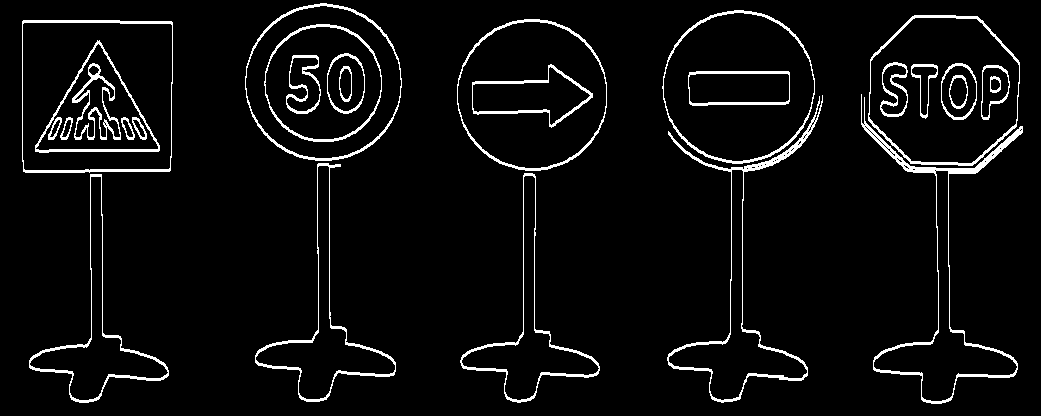

In [ ]:
kernel = np.ones((3))
img_dilated = cv2.dilate(img_canny, kernel, iterations=1)
cv2_imshow(img_dilated)

In [ ]:
def get_contours(img, img_contour):
  contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

  for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 9000:
      cv2.drawContours(img_contour, cnt, -1, (255, 0, 255), 1)

      # Find length of contours
      param = cv2.arcLength(cnt, True)

      # Approximate what type of shape this is
      approx = cv2.approxPolyDP(cnt, 0.01 * param, True)
      shape, x, y, w, h = find_shape(approx)
      cv2.putText(img_contour, shape, (x+78, y+200), cv2.FONT_HERSHEY_COMPLEX, .7, (255, 0, 255), 1)

  return approx, param, img_contour, contours, cnt

In [ ]:
def find_shape(approx):
  x, y, w, h = cv2.boundingRect(approx)
  if len(approx) == 3:
    s = "Triangle"
  
  elif len(approx) == 4:
    calculation = w / float(h)
    if calculation >= 0.95:
      s = "Square"
    else:
      s = "Rectangle"
    
  elif len(approx) == 5:
    s = "Pentagon"
  
  elif len(approx) == 8:
    s = "Octagon"
  
  else:
    s = "Circle"
  
  return s, x, y, w, h

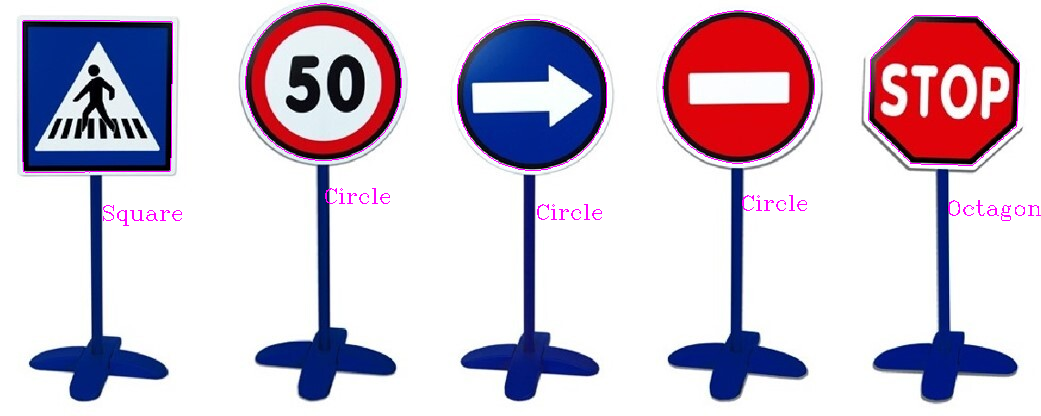

In [ ]:
get_contours(img_dilated, img_contour)
cv2_imshow(img_contour)

# APPROXPOLYDP

In [ ]:
!wget http://4.bp.blogspot.com/-wkV5TsNjNjc/UlwWE5j7AsI/AAAAAAAAAIg/VumvxpCNTJw/s1600/Africa-outline-map.jpg -O map.png

--2020-12-02 08:48:44--  http://4.bp.blogspot.com/-wkV5TsNjNjc/UlwWE5j7AsI/AAAAAAAAAIg/VumvxpCNTJw/s1600/Africa-outline-map.jpg
Resolving 4.bp.blogspot.com (4.bp.blogspot.com)... 173.194.217.132, 2607:f8b0:400c:c13::84
Connecting to 4.bp.blogspot.com (4.bp.blogspot.com)|173.194.217.132|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36500 (36K) [image/jpeg]
Saving to: ‘map.png’

map.png             100%[===================>]  35.64K  --.-KB/s    in 0s      

2020-12-02 08:48:44 (334 MB/s) - ‘map.png’ saved [36500/36500]



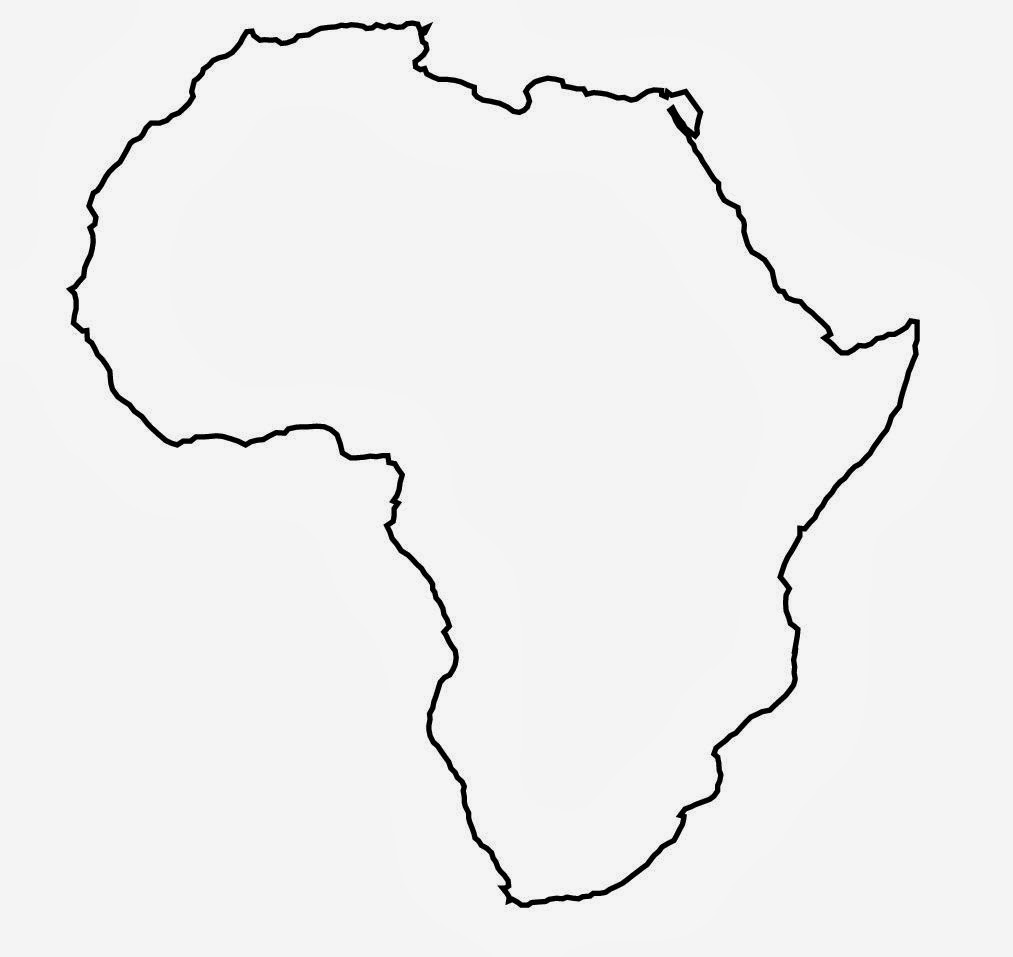

In [ ]:
img = cv2.imread("map.png")
cv2_imshow(img)

In [ ]:
img = cv2.imread("map.png")
img_contour = img.copy()

img_blur = cv2.GaussianBlur(img, (7, 7), 1)
img_gray = cv2.cvtColor(img_blur, cv2.COLOR_BGR2GRAY)

img_canny = cv2.Canny(img_gray, 50, 190)

kernel = np.ones((2))
img_dilated = cv2.dilate(img_canny, kernel, iterations=1)

def get_contours(img, img_contour):
  contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  fig = plt.figure(figsize=(12, 8))
  cnt = contours[0]

  for i in range(50):
    img_c = img_contour.copy()
    approx = cv2.approxPolyDP(cnt, i * 1, True)
    cv2.drawContours(img_c, [approx], -1, (255, 0, 255), 2)
    plt.imshow(img_c)
    plt.axis('off')
    plt.savefig(f"image_0{i}.png")

  return approx, img_contour, contours

get_contours(img_dilated, img_contour);

In [ ]:
import imageio
images = []

for i in range(50):
    data = imageio.imread(f'image_0{i}.png')
    images.append(data)

imageio.mimwrite("animation.gif", images, format= '.gif', fps = 3)

# HULL

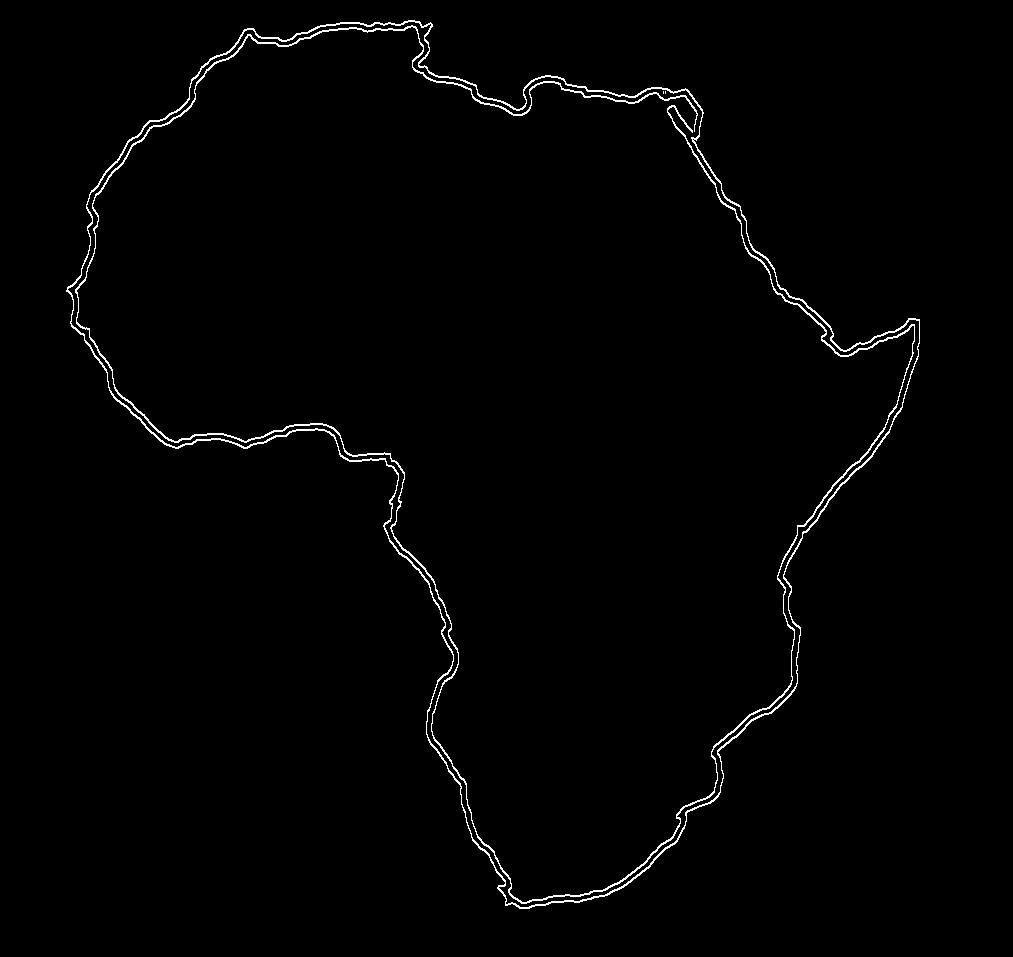

In [ ]:
img = cv2.imread("map.png")
img_contour = img.copy()

img_blur = cv2.GaussianBlur(img, (7, 7), 1)
img_gray = cv2.cvtColor(img_blur, cv2.COLOR_BGR2GRAY)

img_canny = cv2.Canny(img_gray, 50, 190)

kernel = np.ones((2))
img_dilated = cv2.dilate(img_canny, kernel, iterations=1)
cv2_imshow(img_dilated)

In [ ]:
def get_contours(img, img_contour):
  contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

  cnt = contours[0]
  hull = cv2.convexHull(cnt)

  cv2.drawContours(img_contour, [hull], -1, (255, 0, 255), 2)

  M = cv2.moments(cnt)

  cx = int(M['m10']/M['m00'])
  cy = int(M['m01']/M['m00'])

  cv2.circle(img_contour, (cx, cy), 20, (255,0,255))

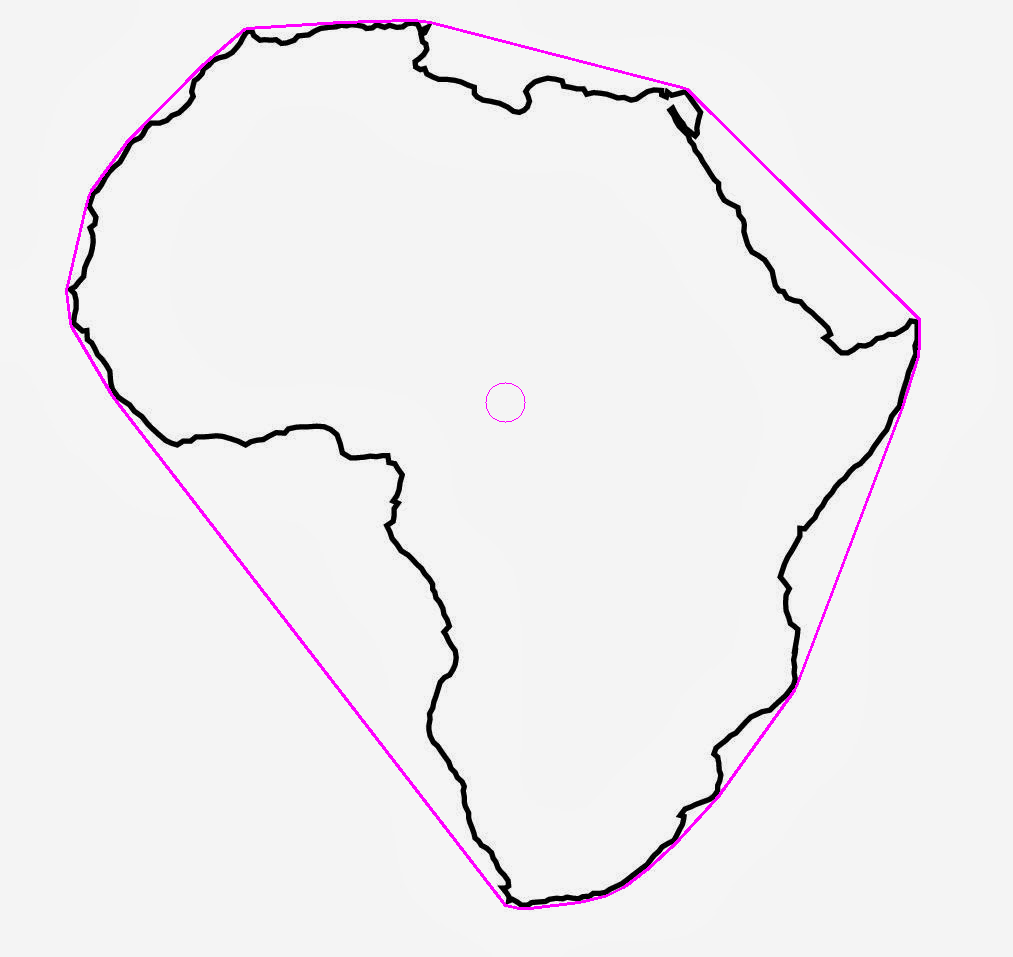

In [ ]:
get_contours(img_dilated, img_contour)
cv2_imshow(img_contour)